In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import torch
from lib.models import BiggerResNetAE, ResNetClassifier
from lib.datasets import AccRawDataset
from lib.modules import *

In [7]:
nursing_trainloader = torch.load('pytorch_datasets/nursing_trainloader_11-25-23.pt')
nursing_testloader = torch.load('pytorch_datasets/nursing_testloader_11-25-23.pt')

In [3]:
trainloader = torch.load('pytorch_datasets/trainloader_12-5-23.pt')
testloader = torch.load('pytorch_datasets/testloader_12-5-23.pt')

In [26]:
model = ResNetClassifier(winsize=101, in_channels=3).to('cuda:1') # BiggerResNetAE(in_channels=3).to('cuda:1')
criterion = nn.BCEWithLogitsLoss()

In [35]:
for X,y in nursing_trainloader:
    X = X.to('cuda:1')
    y = y.to('cuda:1')
    ypred = model(X)
    print(ypred)
    break

tensor([[-1.0738e-01],
        [-2.3331e-01],
        [-2.6220e-01],
        [ 1.3134e-01],
        [-2.6889e-01],
        [ 2.4472e-01],
        [-3.9595e-02],
        [-1.9838e-01],
        [-2.7365e-01],
        [ 1.8381e-02],
        [ 2.7737e-02],
        [-3.2715e-01],
        [-2.4830e-01],
        [-3.4505e-01],
        [-4.1260e-02],
        [-2.6501e-01],
        [-6.9329e-02],
        [-2.5673e-01],
        [-7.3484e-03],
        [ 1.9005e-04],
        [-1.7350e-01],
        [-2.6878e-02],
        [-3.0894e-01],
        [-2.6900e-01],
        [-1.1462e-01],
        [-1.6333e-01],
        [-2.1160e-02],
        [-4.4180e-02],
        [ 1.3454e-01],
        [ 2.2424e-01],
        [-3.1918e-01],
        [ 3.8341e-02],
        [-1.4968e-01],
        [-2.7066e-01],
        [ 4.3851e-03],
        [-1.9489e-01],
        [-2.5345e-01],
        [-1.8123e-01],
        [-3.0084e-01],
        [-2.6426e-01],
        [-1.3876e-01],
        [-1.5895e-01],
        [ 2.4360e-01],
        [-2

In [ ]:
model.load_state_dict(torch.load('dev/5_resnetautoencoder/5_autoencoder-resnet/best_model.pt'))
# model.load_state_dict(torch.load('dev/6_bigger-autoencoder/best_model.pt'))

In [39]:
test_idxs = torch.sort((torch.rand(20) * len(testloader)).round().int())[0]

In [36]:
for i,X in enumerate(testloader):
    if i not in test_idxs:
        continue
    Xpred = model(X.to('cuda')).detach().cpu()
    

0


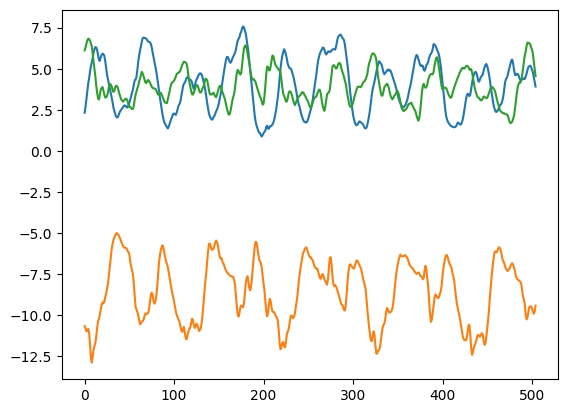

In [64]:
import matplotlib.pyplot as plt
plt.plot(x[0,0:505])
plt.plot(x[0,505:1010])
plt.plot(x[0,1010:1515])

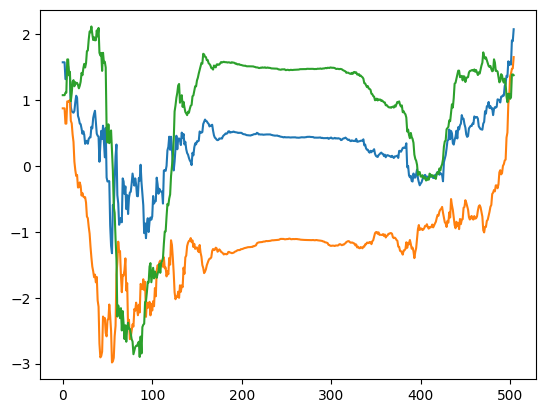

In [58]:
import matplotlib.pyplot as plt
plt.plot(y[0,0])
plt.plot(y[0,1])
plt.plot(y[0,2])